# Modeling and Simulation in Python

Copyright 2018 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Modeling tree growth

In [2]:
years = [2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30,
         35, 40, 45, 50, 55, 60, 65, 70]

[2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

In [3]:
site65 = Series([1.4, 1.56, 2.01, 2.76, 3.79, 6.64, 10.44, 
                 23.26, 37.65, 51.66, 65.00, 77.50, 89.07, 
                 99.66, 109.28, 117.96, 125.74, 132.68, 138.84],
               index=years)

2       1.40
3       1.56
4       2.01
5       2.76
6       3.79
8       6.64
10     10.44
15     23.26
20     37.65
25     51.66
30     65.00
35     77.50
40     89.07
45     99.66
50    109.28
55    117.96
60    125.74
65    132.68
70    138.84
dtype: float64

In [4]:
site45 = Series([1.4, 1.49, 1.75, 2.18, 2.78, 4.45, 6.74,
                 14.86, 25.39, 35.60, 45.00, 53.65, 61.60,
                68.92, 75.66, 81.85, 87.56, 92.8, 97.63],
               index=years)

2      1.40
3      1.49
4      1.75
5      2.18
6      2.78
8      4.45
10     6.74
15    14.86
20    25.39
25    35.60
30    45.00
35    53.65
40    61.60
45    68.92
50    75.66
55    81.85
60    87.56
65    92.80
70    97.63
dtype: float64

In [5]:
site = site65

2       1.40
3       1.56
4       2.01
5       2.76
6       3.79
8       6.64
10     10.44
15     23.26
20     37.65
25     51.66
30     65.00
35     77.50
40     89.07
45     99.66
50    109.28
55    117.96
60    125.74
65    132.68
70    138.84
dtype: float64

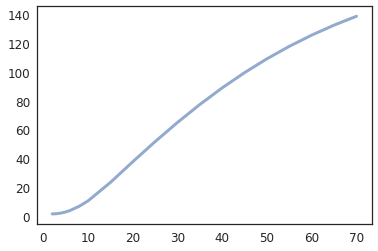

In [6]:
plot(site)

In [7]:
def update(year, mass, state):
    height = mass**(1/tree.dimension)
    area = height**2
    growth = state.alpha * area * (1 - height/tree.K)
    return mass + growth

In [8]:
t0 = years[0]
h0 = site[t0]

1.4

In [9]:
tree = State(mass=1, alpha=2.1, dimension=2.55, K=155)

,values
mass,1.00
alpha,2.10
dimension,2.55
K,155.00


In [10]:
m0 = h0**tree.dimension

2.3584490089366774

In [11]:
tree.masses = Series({t0: m0})

for i in range(t0, 70):
    tree.masses[i+1] = update(i, tree.masses[i], tree)

In [12]:
# TODO: check whether there are any labeled lines before calling lengend,
# or suppress the warning

In [13]:
heights = tree.masses**(1.0/tree.dimension)

2       1.400000
3       2.075573
4       2.919335
5       3.936394
6       5.128516
7       6.494778
8       8.032075
9       9.735528
10     11.598812
11     13.614416
12     15.773870
13     18.067930
14     20.486750
15     23.020027
16     25.657138
17     28.387258
18     31.199476
19     34.082890
20     37.026702
21     40.020298
22     43.053320
23     46.115733
24     49.197875
25     52.290508
26     55.384854
27     58.472628
28     61.546059
29     64.597906
30     67.621473
31     70.610607
         ...    
41     97.629654
42     99.980806
43    102.262093
44    104.473134
45    106.613825
46    108.684319
47    110.685001
48    112.616461
49    114.479475
50    116.274985
51    118.004076
52    119.667959
53    121.267953
54    122.805468
55    124.281993
56    125.699076
57    127.058317
58    128.361355
59    129.609852
60    130.805493
61    131.949968
62    133.044969
63    134.092184
64    135.093287
65    136.049935
66    136.963763
67    137.836382
68    138.6693

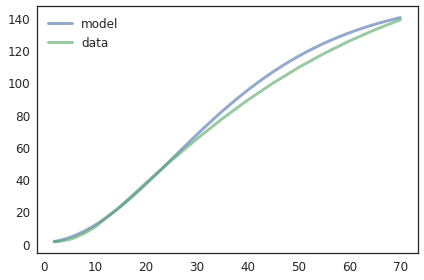

In [14]:
plot(heights, label='model')
plot(site, label='data')
decorate()

In [15]:
tree = State(t0=t0, h0=1.4, alpha=4, dimension=2.75, K=180)

,values
t0,2.00
h0,1.40
alpha,4.00
dimension,2.75
K,180.00


In [16]:
def run_model(state):
    m0 = h0**tree.dimension
    tree.masses = Series({state.t0: m0})

    for i in range(t0, 70):
        tree.masses[i+1] = update(i, tree.masses[i], state)

In [17]:
run_model(tree)
heights = tree.masses**(1/tree.dimension)

IndexError: index 3 is out of bounds for axis 0 with size 1

In [18]:
def print_errors(model, data):
    abs_err = abs(model[data.index] - data)
    rel_err = abs_err / data * 100
    print(rel_err)

In [19]:
def error(model, data):
    abs_err = abs(model[data.index] - data)
    rel_err = abs_err / data * 100
    return abs_err.mean()

In [20]:
print_errors(heights, site)

2      0.000000
3     49.694226
4     75.105242
5     78.623363
6     72.577674
8     54.603746
10    39.104139
15    14.628389
20     5.888718
25     3.098765
30     2.010609
35     1.521434
40     1.258326
45     1.093650
50     0.959699
55     0.832736
60     0.710257
65     0.588058
70     0.469444
dtype: float64


In [21]:
error(heights, site)

1.6414244679037722

In [22]:
from scipy.optimize import fmin

In [23]:
alpha = 2.1
dimension = 2.55
K = 155

In [24]:
x0 = [alpha, dimension, K]

In [25]:
def func(x, tree):
    tree.alpha, tree.dimension, tree.K = x
    run_model(tree)
    heights = tree.masses**(1/tree.dimension)
    return error(heights, site)

In [26]:
func(x0, tree)

2.7080403545468705

In [27]:
args = (tree,)
params = fmin(func, x0, args=args)
params

Optimization terminated successfully.
         Current function value: 0.816658
         Iterations: 227
         Function evaluations: 402


array([   3.15699844,    2.68802177,  172.20946257])

In [28]:
tree.alpha, tree.dimension, tree.K = params
run_model(tree)
heights = tree.masses**(1/tree.dimension)

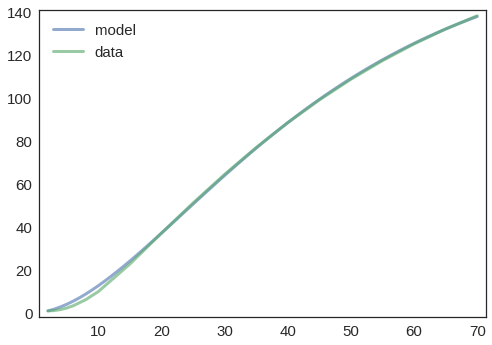

In [29]:
plot(heights, label='model')
plot(site, label='data')
decorate()

In [30]:
error(heights, site)

0.8166584949092535